# Knapsack Resolution

This code analyse the results of the resolution of the 0-1 knapsack problems with two complete methods and two incomplete methods done with ChocoSolver, as well as a Linear Programming method done with OR-tools.

Instances are of three kind: 
- **Easy**, with a size of $n=50$ objects;
- **Medium**, with a size of $n=100$ objects;
- **Difficult**, with a size of $n=1000$ objects.

All objects weights are drawn in a data range of $R=1000$, and instances are taken from the benchmark available on [this repository](https://github.com/likr/kplib).

-----

In [19]:
#### Library Imports ####
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

----

In [16]:
#### Reading Data ####
filename = 'results1.csv'
data_path = os.path.join('..', '..', 'results', filename)
if not os.path.exists(data_path):
    print(f"Error: The file {filename} does not exist in the results directory.")
else :
    data = pd.read_csv(data_path, header=0, sep=',', index_col=False)
    print(f"Data from {filename} successfully loaded.")

Data from results1.csv successfully loaded.


In [17]:
data.head()

,Instance,Difficulty,Class,n,Capacity,TotalWeight,TotalProfit,Method,Value,Time(ms),Nodes,Optimal,OptimalKnown,Gap(%)
0,00Uncorrelated_n00050_R01000_s000,facile,Unknown,50,14778,29853,28763,Complete_FirstFail,19337,60004,22058570,False,-1,-1
1,00Uncorrelated_n00050_R01000_s000,facile,Unknown,50,14778,29853,28763,Complete_DomOverWDeg,20052,60012,8715465,False,-1,-1
2,00Uncorrelated_n00050_R01000_s000,facile,Unknown,50,14778,29853,28763,Complete_MILP_ORTools,20995,10,-1,True,-1,-1
3,00Uncorrelated_n00050_R01000_s000,facile,Unknown,50,14778,29853,28763,Incomplete_LNS,14507,60000,23146920,False,-1,-1
4,00Uncorrelated_n00050_R01000_s000,facile,Unknown,50,14778,29853,28763,Incomplete_Greedy,20995,1,0,False,-1,-1


In [ ]:
#### Adding TimeOut Column ####
timeout = 60_000  # 60 seconds in milliseconds
data["TimeOut"] = data["Time(ms)"].astype(int) >= timeout
data.head()

,Instance,Difficulty,Class,n,Capacity,TotalWeight,TotalProfit,Method,Value,Time(ms),Nodes,Optimal,OptimalKnown,Gap(%),TimeOut
0,00Uncorrelated_n00050_R01000_s000,facile,Unknown,50,14778,29853,28763,Complete_FirstFail,19337,60004,22058570,False,-1,-1,True
1,00Uncorrelated_n00050_R01000_s000,facile,Unknown,50,14778,29853,28763,Complete_DomOverWDeg,20052,60012,8715465,False,-1,-1,True
2,00Uncorrelated_n00050_R01000_s000,facile,Unknown,50,14778,29853,28763,Complete_MILP_ORTools,20995,10,-1,True,-1,-1,False
3,00Uncorrelated_n00050_R01000_s000,facile,Unknown,50,14778,29853,28763,Incomplete_LNS,14507,60000,23146920,False,-1,-1,True
4,00Uncorrelated_n00050_R01000_s000,facile,Unknown,50,14778,29853,28763,Incomplete_Greedy,20995,1,0,False,-1,-1,False


In [27]:
#### Testing if incomplete methods give near optimal solutions ####
threshold = 0.01  # 5% optimality gap
incomplete_methods = ['Incomplete_LNS', 'Incomplete_Greedy']
ground_truth_method = 'Complete_MILP_ORTools'
for method in incomplete_methods:
    merged = pd.merge(
        data[data['Method'] == method],
        data[data['Method'] == ground_truth_method],
        on=['n', 'Capacity', 'Instance'],
        suffixes=('_incomplete', '_ground_truth')
    )
    merged['optimality_gap'] = abs(merged['Value_incomplete'] - merged['Value_ground_truth']) / merged['Value_ground_truth']
    avg_gap = merged['optimality_gap'].mean()
    print(f"Average optimality gap for {method}: {avg_gap:.4f}")
    
    # Mark as optimal the found solution is within the threshold of the ground truth for this particular (method, n, Capacity, Instance)
    merged['is_optimal'] = merged['optimality_gap'] <= threshold
    for idx, row in merged.iterrows():
        data.loc[
            (data['Method'] == method) &
            (data['n'] == row['n']) &
            (data['Capacity'] == row['Capacity']) &
            (data['Instance'] == row['Instance']),
            'Optimal'
        ] = row['is_optimal']

data.head(10)

Average optimality gap for Incomplete_LNS: 0.1385
Average optimality gap for Incomplete_Greedy: 0.0025


,Instance,Difficulty,Class,n,Capacity,TotalWeight,TotalProfit,Method,Value,Time(ms),Nodes,Optimal,OptimalKnown,Gap(%),TimeOut
0,00Uncorrelated_n00050_R01000_s000,facile,Unknown,50,14778,29853,28763,Complete_FirstFail,19337,60004,22058570,False,-1,-1,True
1,00Uncorrelated_n00050_R01000_s000,facile,Unknown,50,14778,29853,28763,Complete_DomOverWDeg,20052,60012,8715465,False,-1,-1,True
2,00Uncorrelated_n00050_R01000_s000,facile,Unknown,50,14778,29853,28763,Complete_MILP_ORTools,20995,10,-1,True,-1,-1,False
3,00Uncorrelated_n00050_R01000_s000,facile,Unknown,50,14778,29853,28763,Incomplete_LNS,14507,60000,23146920,False,-1,-1,True
4,00Uncorrelated_n00050_R01000_s000,facile,Unknown,50,14778,29853,28763,Incomplete_Greedy,20995,1,0,True,-1,-1,False
5,00Uncorrelated_n00050_R01000_s001,facile,Unknown,50,13598,27468,23823,Complete_FirstFail,19144,60000,21079565,False,-1,-1,True
6,00Uncorrelated_n00050_R01000_s001,facile,Unknown,50,13598,27468,23823,Complete_DomOverWDeg,18836,60000,12365643,False,-1,-1,True
7,00Uncorrelated_n00050_R01000_s001,facile,Unknown,50,13598,27468,23823,Complete_MILP_ORTools,19836,6,-1,True,-1,-1,False
8,00Uncorrelated_n00050_R01000_s001,facile,Unknown,50,13598,27468,23823,Incomplete_LNS,15057,60001,24054672,False,-1,-1,True
9,00Uncorrelated_n00050_R01000_s001,facile,Unknown,50,13598,27468,23823,Incomplete_Greedy,19836,0,0,True,-1,-1,False


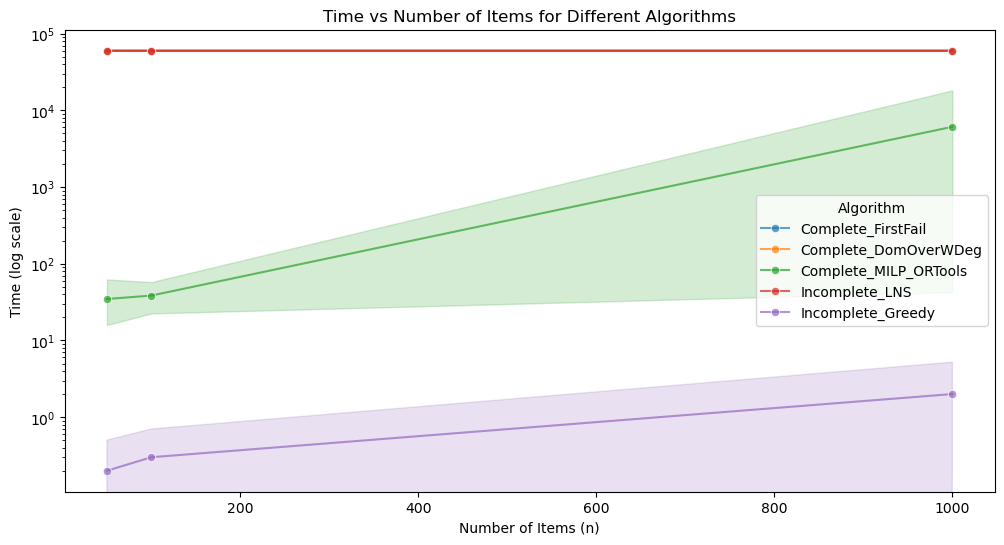

In [32]:
#### Plot time vs n for different algorithms ####
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='n', y='Time(ms)', hue='Method', marker='o', alpha=0.7)
plt.yscale('log')
plt.xlabel('Number of Items (n)')
plt.ylabel('Time (log scale)')
plt.title('Time vs Number of Items for Different Algorithms')
plt.legend(title='Algorithm')
plt.show()

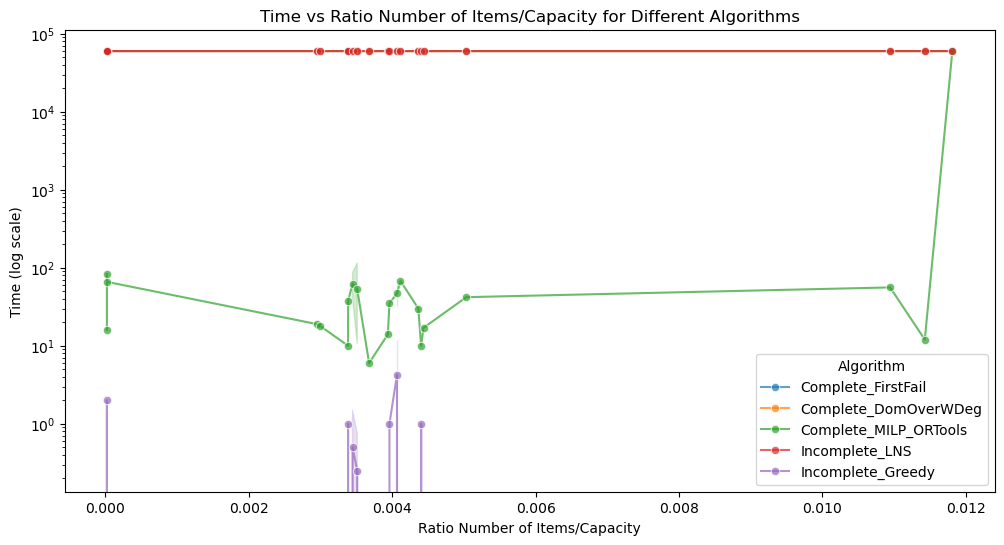

In [39]:
#### Plot time vs ratio n/capacity for different algorithms ####
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x=data['n'] / data['Capacity'], y='Time(ms)', hue='Method', marker='o', alpha=0.7)
plt.yscale('log')
plt.xlabel('Ratio Number of Items/Capacity')
plt.ylabel('Time (log scale)')
plt.title('Time vs Ratio Number of Items/Capacity for Different Algorithms')
plt.legend(title='Algorithm')
plt.show()

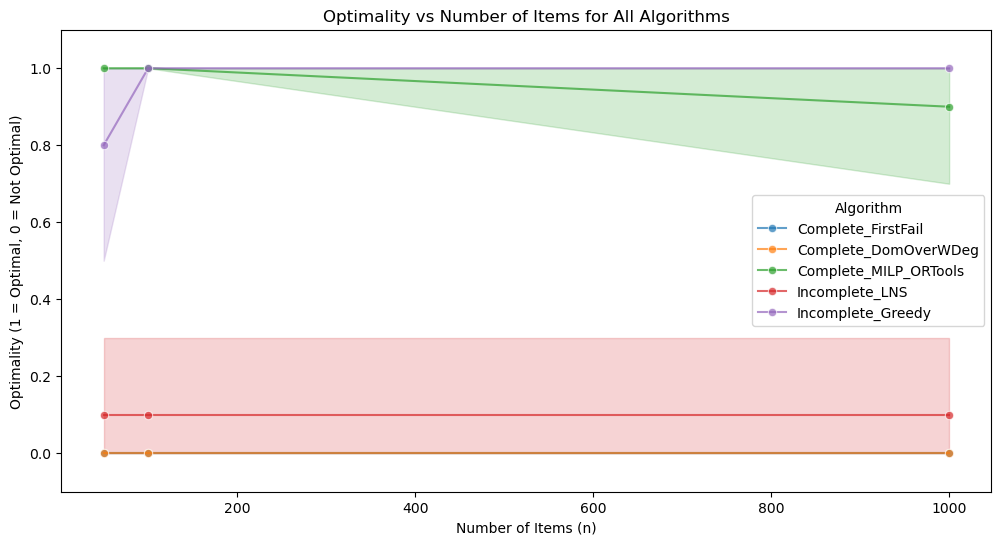

In [35]:
#### Plot optimality vs n for all algorithms ####
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='n', y='Optimal', hue='Method', marker='o', alpha=0.7)
plt.ylim(-0.1, 1.1)
plt.xlabel('Number of Items (n)')
plt.ylabel('Optimality (1 = Optimal, 0 = Not Optimal)')
plt.title('Optimality vs Number of Items for All Algorithms')
plt.legend(title='Algorithm')
plt.show()

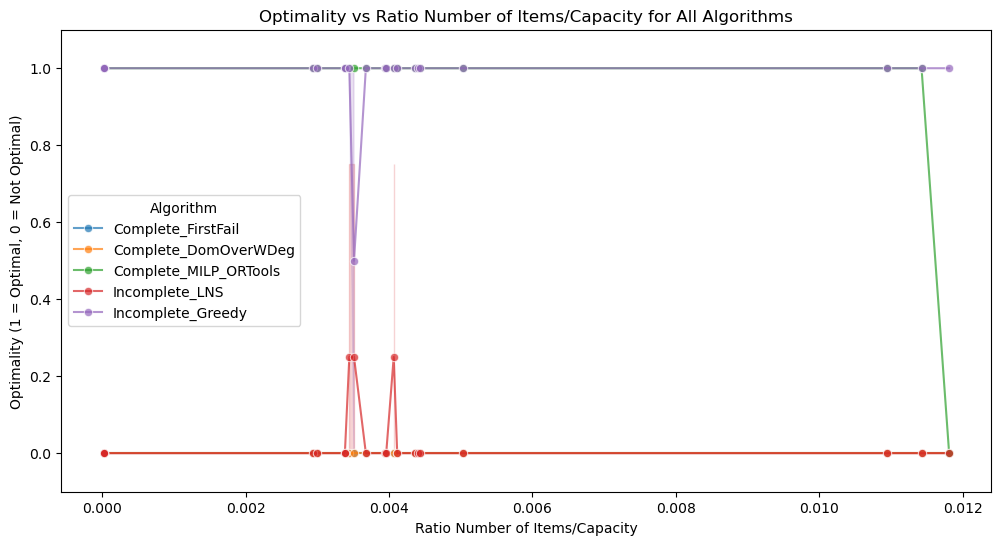

In [40]:
#### Plot optimality vs Ratio n/Capacity for all algorithms ####
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x=data['n'] / data['Capacity'], y='Optimal', hue='Method', marker='o', alpha=0.7)
plt.ylim(-0.1, 1.1)
plt.xlabel('Ratio Number of Items/Capacity')
plt.ylabel('Optimality (1 = Optimal, 0 = Not Optimal)')
plt.title('Optimality vs Ratio Number of Items/Capacity for All Algorithms')
plt.legend(title='Algorithm')
plt.show()